In [1]:
import pandas as pd
import utils.preprocessing as pp
import utils.constants as c
import utils.visualization as vis

In [32]:
import importlib

importlib.reload(pp)
importlib.reload(c)
importlib.reload(vis)

<module 'utils.visualization' from 'd:\\FERI\\transfer-learning\\src\\utils\\visualization.py'>

In [33]:
datasets = c.get_countries('Rice')
dfs = []

In [34]:
for dataset in datasets:
    df = pd.read_csv(dataset['raw'])       
    df = pp.sort_extract_price(df, 'Rice', dataset['criteria'])
    df.to_csv(dataset['processed'], index=False)
    dfs.append(df)

C:\Users\user\AppData\Local\Temp\ipykernel_14792\1888482166.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])
C:\Users\user\AppData\Local\Temp\ipykernel_14792\1888482166.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])


In [35]:
titles = [
    "Afghanistan",
    "Bangladesh",
    "India",
    "Indonesia",
    "Lao",
    "Pakistan",
    "Palestine",
    "Tajikistan"
]

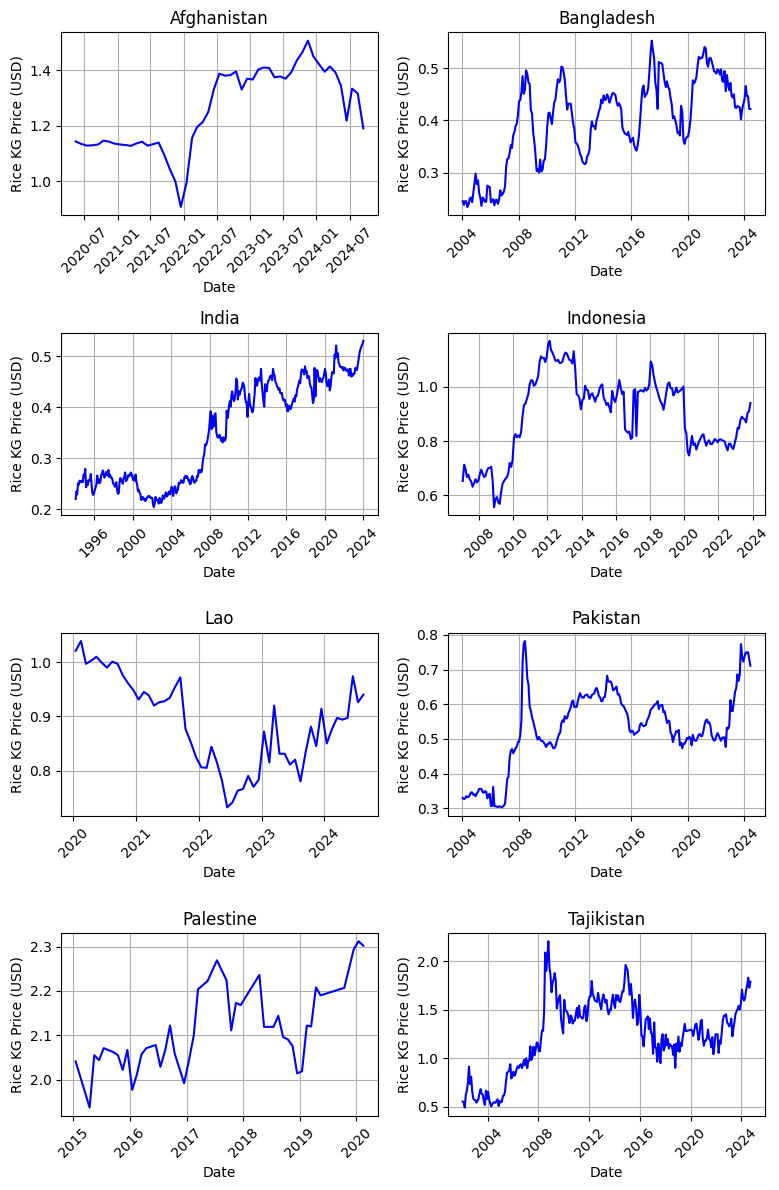

In [36]:
vis.plot_line_charts(dfs, "date", "usdprice", titles, "Date", "Rice KG Price (USD)")

In [16]:
for i, dataset in enumerate(titles):
    pp.check_normality(dfs[i]["usdprice"], titles[i])

Afghanistan: Statistics=0.821, p=0.000, Not normal
Bangladesh: Statistics=0.593, p=0.000, Not normal
India: Statistics=0.581, p=0.000, Not normal
Indonesia: Statistics=0.711, p=0.000, Not normal
Lebanon: Statistics=0.881, p=0.000, Not normal
Pakistan: Statistics=0.619, p=0.000, Not normal
Palestine: Statistics=0.974, p=0.000, Not normal
Tajikistan: Statistics=0.689, p=0.000, Not normal
